#Importing the Dependencies

In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sns
from IPython import display

In [ ]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

#Data Collection & Processing

Load the train data from csv

In [ ]:
train_df = pd.read_csv('../input/credit-score-classification/train.csv', na_values = '?')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of rows and Columns

In [ ]:
train_df.shape

(100000, 28)

Printing the first 5 rows of the dataframe

In [ ]:
train_df.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


Getting some statistical measures about the data

In [ ]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Checking the unique values

In [ ]:
train_df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

Getting some informations about the data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Checking the Duplicates

In [ ]:
train_df.drop_duplicates(keep = 'first', inplace = True)
print(train_df.shape)

(100000, 28)


Check the number of missing values in each column

In [ ]:
train_df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Checking the Data Types

In [ ]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

#Data Analysis

In [ ]:
print(train_df.value_counts())

ID       Customer_ID  Month     Name            Age  SSN          Occupation     Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Type_of_Loan                                                                                                    Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age      Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour                 Monthly_Balance     Credit_Score
0x10003  CUS_0x54c3   February  Kwoka           28   764-29-3740  Engineer       18354.805      1457.567083            0                  3                8              1            Personal Loan                                                                                                   24                   7                       5.85                  4.0                   Good        863.

In [ ]:
train_df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

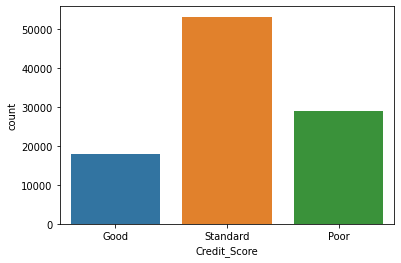

In [ ]:
sns.countplot(train_df['Credit_Score'])

In [ ]:
train_df1 = train_df.drop(['ID', 'Customer_ID', 'Type_of_Loan', 'Month', 'Name', 'SSN'], axis=1)

In [ ]:
train_df1.shape

(100000, 22)

In [ ]:
train_df1.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
train_df1 = train_df1.applymap(
  lambda x: x if x is np.NaN or not \
    isinstance(x, str) else str(x).strip('_')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

Conveting the astypes of the columns

In [ ]:
train_df1['Age'] = train_df1['Age'].astype(int)
train_df1['Annual_Income'] = train_df1['Annual_Income'].astype(float)
train_df1['Num_of_Loan'] = train_df1['Num_of_Loan'].astype(int)
train_df1['Num_of_Delayed_Payment'] = train_df1['Num_of_Delayed_Payment'].astype(float)
train_df1['Changed_Credit_Limit'] = train_df1['Changed_Credit_Limit'].astype(float)
train_df1['Outstanding_Debt'] = train_df1['Outstanding_Debt'].astype(float)
train_df1['Amount_invested_monthly'] = train_df1['Amount_invested_monthly'].astype(float)
train_df1['Monthly_Balance'] = train_df1['Monthly_Balance'].astype(float)

In [ ]:
def take_years(x):  
    if x is not None:
        return str(x).strip()[0:2]

train_df1['Credit_History_Age']=train_df1['Credit_History_Age'].apply(take_years)
train_df1['Credit_History_Age'] = train_df1['Credit_History_Age'].replace({'na': np.NaN})

Converting the object into Category

In [ ]:
cat_cols = train_df1.select_dtypes(include='object').columns
for col in cat_cols:
    train_df1[col] = train_df1[col].astype('category')

Dividing the Cat and Num columns

In [ ]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
            'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
            'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', ]

In [ ]:
cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

#Splitting the data into training data & Test data

Separating features & Target

In [ ]:
X = train_df1.drop(['Credit_Score'], axis = 1)
y = train_df1['Credit_Score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 21)
(30000, 21)
(70000,)
(30000,)


In [ ]:
y_train.value_counts(normalize = True)*100

Standard    53.235714
Poor        28.925714
Good        17.838571
Name: Credit_Score, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)*100

Standard    53.030000
Poor        29.166667
Good        17.803333
Name: Credit_Score, dtype: float64

In [ ]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]
print(df_cat_train.shape)
print(df_cat_test.shape)

(70000, 4)
(30000, 4)


In [ ]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]
print(df_num_train.shape)
print(df_num_test.shape)

(70000, 17)
(30000, 17)


#Handling the Missing values

In [ ]:
from sklearn.impute import SimpleImputer
cat_imp = SimpleImputer(strategy = 'most_frequent')
cat_imp.fit(df_cat_train)

df_cat_imp_train = pd.DataFrame(cat_imp.transform(df_cat_train), columns = cat_cols)
df_cat_imp_test = pd.DataFrame(cat_imp.transform(df_cat_test), columns = cat_cols)
print(df_cat_imp_train.shape)
print(df_cat_imp_test.shape)

(70000, 4)
(30000, 4)


In [ ]:
print(df_cat_imp_train.isna().sum())
print(df_cat_imp_test.isna().sum())

Occupation               0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
dtype: int64
Occupation               0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
dtype: int64


In [ ]:
print(df_cat_imp_train.nunique())

Occupation               15
Credit_Mix                3
Payment_of_Min_Amount     3
Payment_Behaviour         6
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy = 'median')
num_imp.fit(df_num_train)

df_num_imp_train = pd.DataFrame(num_imp.transform(df_num_train), columns = num_cols)
df_num_imp_test = pd.DataFrame(num_imp.transform(df_num_test), columns = num_cols)
print(df_num_imp_train.shape)
print(df_num_imp_test.shape)

(70000, 17)
(30000, 17)


In [ ]:
print(df_num_imp_train.isna().sum())
print(df_num_imp_train.isna().sum())

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Total_EMI_per_month         0
Amount_invested_monthly    

#Converting the Category into numeric

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(df_cat_imp_train)

df_cat_imp_train_ohe = ohe.transform(df_cat_imp_train).toarray()
df_cat_imp_test_ohe = ohe.transform(df_cat_imp_test).toarray()
print(df_cat_imp_train_ohe.shape)
print(df_cat_imp_test_ohe.shape)

(70000, 27)
(30000, 27)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_num_imp_train)

df_num_imp_train_ss = ss.transform(df_num_imp_train)
df_num_imp_test_ss = ss.transform(df_num_imp_test)
print(df_num_imp_train_ss.shape)
print(df_num_imp_test_ss.shape)

(70000, 17)
(30000, 17)


In [ ]:
X_train_con = np.concatenate([df_cat_imp_train_ohe, df_num_imp_train_ss], axis = 1)
X_test_con = np.concatenate([df_cat_imp_test_ohe, df_num_imp_test_ss], axis = 1)
print(X_train_con.shape)
print(X_test_con.shape)

(70000, 44)
(30000, 44)


In [ ]:
y_train.value_counts()

Standard    37265
Poor        20248
Good        12487
Name: Credit_Score, dtype: int64

#Building the Model

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_con,y_train)

LogisticRegression()

In [ ]:
lr_train_preds = lr.predict(X_train_con)
lr_train_preds

array(['Standard', 'Poor', 'Standard', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [ ]:
lr_test_preds = lr.predict(X_test_con)
lr_test_preds

array(['Standard', 'Standard', 'Poor', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [ ]:
lr_train_preds_score = lr.score(X_train_con,y_train)
lr_train_preds_score

0.6201285714285715

In [ ]:
lr_test_preds_score = lr.score(X_test_con,y_test)
lr_test_preds_score

0.6233333333333333

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_con,y_train)

RandomForestClassifier()

In [ ]:
rfc_train_preds = rfc.predict(X_train_con)
rfc_train_preds

array(['Good', 'Poor', 'Poor', ..., 'Standard', 'Standard', 'Standard'],
      dtype=object)

In [ ]:
rfc_test_preds = rfc.predict(X_test_con)
rfc_test_preds

array(['Standard', 'Standard', 'Poor', ..., 'Standard', 'Standard',
       'Poor'], dtype=object)

In [ ]:
rfc_train_preds_score = rfc.score(X_train_con,y_train)
rfc_train_preds_score

1.0

In [ ]:
rfc_test_preds_score = rfc.score(X_test_con,y_test)
rfc_test_preds_score

0.7792666666666667

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_con,y_train)

KNeighborsClassifier()

In [ ]:
knc_train_preds = knc.predict(X_train_con)
knc_train_preds

array(['Good', 'Poor', 'Poor', ..., 'Poor', 'Standard', 'Standard'],
      dtype=object)

In [ ]:
knc_test_preds = knc.predict(X_test_con)
knc_test_preds

array(['Standard', 'Standard', 'Poor', ..., 'Standard', 'Standard',
       'Poor'], dtype=object)

In [ ]:
knc_train_preds_score = knc.score(X_train_con,y_train)
knc_train_preds_score

0.7380142857142857

In [ ]:
knc_test_preds_score = knc.score(X_test_con,y_test)
knc_test_preds_score

0.6170333333333333

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_con,y_train)

DecisionTreeClassifier()

In [ ]:
dtc_train_preds = dtc.predict(X_train_con)
dtc_train_preds

array(['Good', 'Poor', 'Poor', ..., 'Standard', 'Standard', 'Standard'],
      dtype=object)

In [ ]:
dtc_test_preds = dtc.predict(X_test_con)
dtc_test_preds

array(['Standard', 'Standard', 'Standard', ..., 'Poor', 'Good',
       'Standard'], dtype=object)

In [ ]:
dtc_train_preds_score = dtc.score(X_train_con,y_train)
dtc_train_preds_score

1.0

In [ ]:
dtc_test_preds_score = dtc.score(X_test_con,y_test)
dtc_test_preds_score

0.6929

#Importing the Test Data

In [ ]:
test_df = pd.read_csv('../input/credit-score-classification/test.csv', na_values = '?')

In [ ]:
test_df.shape

(50000, 27)

In [ ]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
test_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [ ]:
test_df.nunique()

ID                          50000
Customer_ID                 12500
Month                           4
Name                        10139
Age                           976
SSN                         12501
Occupation                     16
Annual_Income               16121
Monthly_Inhand_Salary       12793
Num_Bank_Accounts             540
Num_Credit_Card               819
Interest_Rate                 945
Num_of_Loan                   263
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        443
Changed_Credit_Limit         3927
Num_Credit_Inquiries          750
Credit_Mix                      4
Outstanding_Debt            12685
Credit_Utilization_Ratio    50000
Credit_History_Age            399
Payment_of_Min_Amount           3
Total_EMI_per_month         13144
Amount_invested_monthly     45450
Payment_Behaviour               7
Monthly_Balance             49433
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
test_df.drop_duplicates(keep = 'first', inplace = True)
print(test_df.shape)

(50000, 27)


In [ ]:
test_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [ ]:
test_df1 = test_df.drop(['ID', 'Customer_ID', 'Type_of_Loan', 'Month', 'Name', 'SSN'], axis=1)

In [ ]:
test_df1.shape

(50000, 21)

In [ ]:
test_df1 = test_df1.applymap(
  lambda x: x if x is np.NaN or not \
    isinstance(x, str) else str(x).strip('_')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [ ]:
test_df1['Age'] = test_df1['Age'].astype(int)
test_df1['Annual_Income'] = test_df1['Annual_Income'].astype(float)
test_df1['Num_of_Loan'] = test_df1['Num_of_Loan'].astype(int)
test_df1['Num_of_Delayed_Payment'] = test_df1['Num_of_Delayed_Payment'].astype(float)
test_df1['Changed_Credit_Limit'] = test_df1['Changed_Credit_Limit'].astype(float)
test_df1['Outstanding_Debt'] = test_df1['Outstanding_Debt'].astype(float)
test_df1['Amount_invested_monthly'] = test_df1['Amount_invested_monthly'].astype(float)
test_df1['Monthly_Balance'] = test_df1['Monthly_Balance'].astype(float)

In [ ]:
def take_years(x):  
    if x is not None:
        return str(x).strip()[0:2]

test_df1['Credit_History_Age']=test_df1['Credit_History_Age'].apply(take_years)
test_df1['Credit_History_Age'] = test_df1['Credit_History_Age'].replace({'na': np.NaN})

In [ ]:
cat_cols = test_df1.select_dtypes(include='object').columns
for col in cat_cols:
    test_df1[col] = test_df1[col].astype('category')

In [ ]:
cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [ ]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio','Total_EMI_per_month',
            'Amount_invested_monthly','Monthly_Balance', 'Credit_History_Age']

In [ ]:
df_cat = test_df1[cat_cols]
print(df_cat.shape)

(50000, 4)


In [ ]:
df_num = test_df1[num_cols]
print(df_num.shape)

(50000, 17)


In [ ]:
from sklearn.impute import SimpleImputer
cat_imp = SimpleImputer(strategy = 'most_frequent')
cat_imp.fit(df_cat)

df_cat_imp = pd.DataFrame(cat_imp.transform(df_cat), columns = cat_cols)
print(df_cat_imp.shape)

(50000, 4)


In [ ]:
print(df_cat_imp.isna().sum())

Occupation               0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
dtype: int64


In [ ]:
print(df_cat_imp.nunique())

Occupation               15
Credit_Mix                3
Payment_of_Min_Amount     3
Payment_Behaviour         6
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy = 'median')
num_imp.fit(df_num)

df_num_imp = pd.DataFrame(num_imp.transform(df_num), columns = num_cols)
print(df_num_imp.shape)

(50000, 17)


In [ ]:
print(df_num_imp.isna().sum())

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_History_Age          0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(df_cat_imp)

df_cat_imp_ohe = ohe.transform(df_cat_imp).toarray()
print(df_cat_imp_ohe.shape)

(50000, 27)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_num_imp)

df_num_imp_ss = ss.transform(df_num_imp)
print(df_num_imp_ss.shape)

(50000, 17)


In [ ]:
df_test_con = np.concatenate([df_cat_imp_ohe, df_num_imp_ss],axis = 1)
print(df_test_con.shape)

(50000, 44)


#Predicting the Values from Models

In [ ]:
lr_test_preds1 = lr.predict(df_test_con)
lr_test_preds1

array(['Good', 'Good', 'Good', ..., 'Standard', 'Standard', 'Standard'],
      dtype=object)

In [ ]:
lr_sample_submission = pd.DataFrame({"ID":test_df["ID"], "Credit_Score":lr_test_preds1})
lr_sample_submission.shape

(50000, 2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

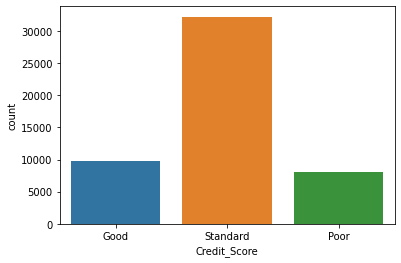

In [ ]:
sns.countplot('Credit_Score', data=lr_sample_submission)

In [ ]:
rfc_test_preds1 = rfc.predict(df_test_con)
rfc_test_preds1

array(['Good', 'Good', 'Good', ..., 'Poor', 'Standard', 'Standard'],
      dtype=object)

In [ ]:
rfc_sample_submission = pd.DataFrame({"ID":test_df["ID"], "Credit_Score":rfc_test_preds1})
rfc_sample_submission.shape

(50000, 2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

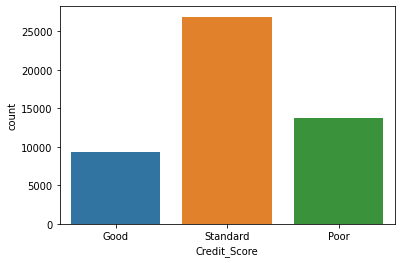

In [ ]:
sns.countplot('Credit_Score', data=rfc_sample_submission)

In [ ]:
knc_test_preds1 = knc.predict(df_test_con)
knc_test_preds1

array(['Good', 'Standard', 'Standard', ..., 'Good', 'Poor', 'Standard'],
      dtype=object)

In [ ]:
knc_sample_submission = pd.DataFrame({"ID":test_df["ID"], "Credit_Score":knc_test_preds1})
knc_sample_submission.shape

(50000, 2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

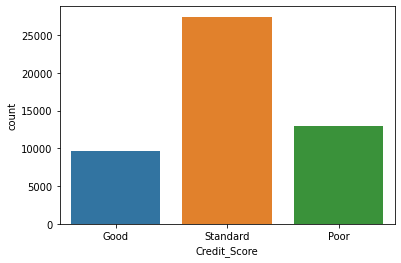

In [ ]:
sns.countplot('Credit_Score', data=knc_sample_submission)

In [ ]:
dtc_test_preds1 = dtc.predict(df_test_con)
dtc_test_preds1

array(['Poor', 'Standard', 'Standard', ..., 'Poor', 'Poor', 'Good'],
      dtype=object)

In [ ]:
dtc_sample_submission = pd.DataFrame({"ID":test_df["ID"], "Credit_Score":dtc_test_preds1})
dtc_sample_submission.shape

(50000, 2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

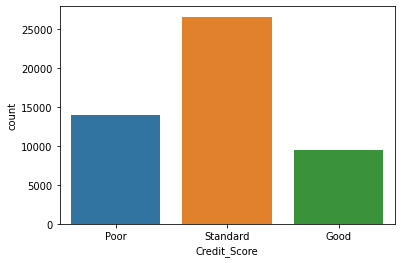

In [ ]:
sns.countplot('Credit_Score', data=dtc_sample_submission)